#Isu pemutusan atau perpanjangan kontrak grup I*zone CJ Entertainment

Dari sudut pandang CJ ENM, sangat disayangkan mengirim IZone, yang telah menangkap dua kelinci, sumber suara dan rekamannya, sebagaimana adanya. Khususnya, sangat disayangkan bagi para penggemar bahwa perpisahan tak terelakkan dalam situasi di mana tur atau konser yang direncanakan akibat insiden corona 19 yang mengikat erat dunia tidak tercerna dengan baik. Hasilnya, berbagai cerita seperti perpanjangan IZone dan teori unit muncul di industri. Baru-baru ini, di Jepang, ada juga laporan tentang akhir kegiatan IZone di bulan April. CJ ENM mengatakan, "Pembongkaran pada April tahun depan belum diputuskan. Kami sedang mendiskusikannya."

## **A.Collecting Data Twitter**

Untuk mengumpulkan data twitter dengan python, kita bisa menggunakan Tweepy. Tweepy adalah Paket Python paling populer untuk mengakses API Twitter, Anda dapat membaca dokumentasi lengkapnya [DI SINI](https://tweepy.readthedocs.io/en/latest/). Dalam latihan ini, kita akan berlatih untuk mendapatkan data tweet menggunakan kata kunci tertentu dan menyimpannya sebagai file .CSV

# **A.Social Network Analysis: Izone permanent**

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import community
import seaborn as sns
import csv

### **Network Contruction**

In [13]:
# Upload Local Dataset (Nodes) 
from google.colab import files
uploaded = files.upload()

Saving izone_permanent(1).csv to izone_permanent(1).csv


In [14]:
df_tweets = pd.read_csv('izone_permanent(1).csv')
df_tweets.head()

source target
0      _cottonxo    NaN
1        48Nakoo    NaN
2  wendybae_0221    NaN
3   notannagrace    NaN
4     rosieszone    NaN

**Visualize The Network**

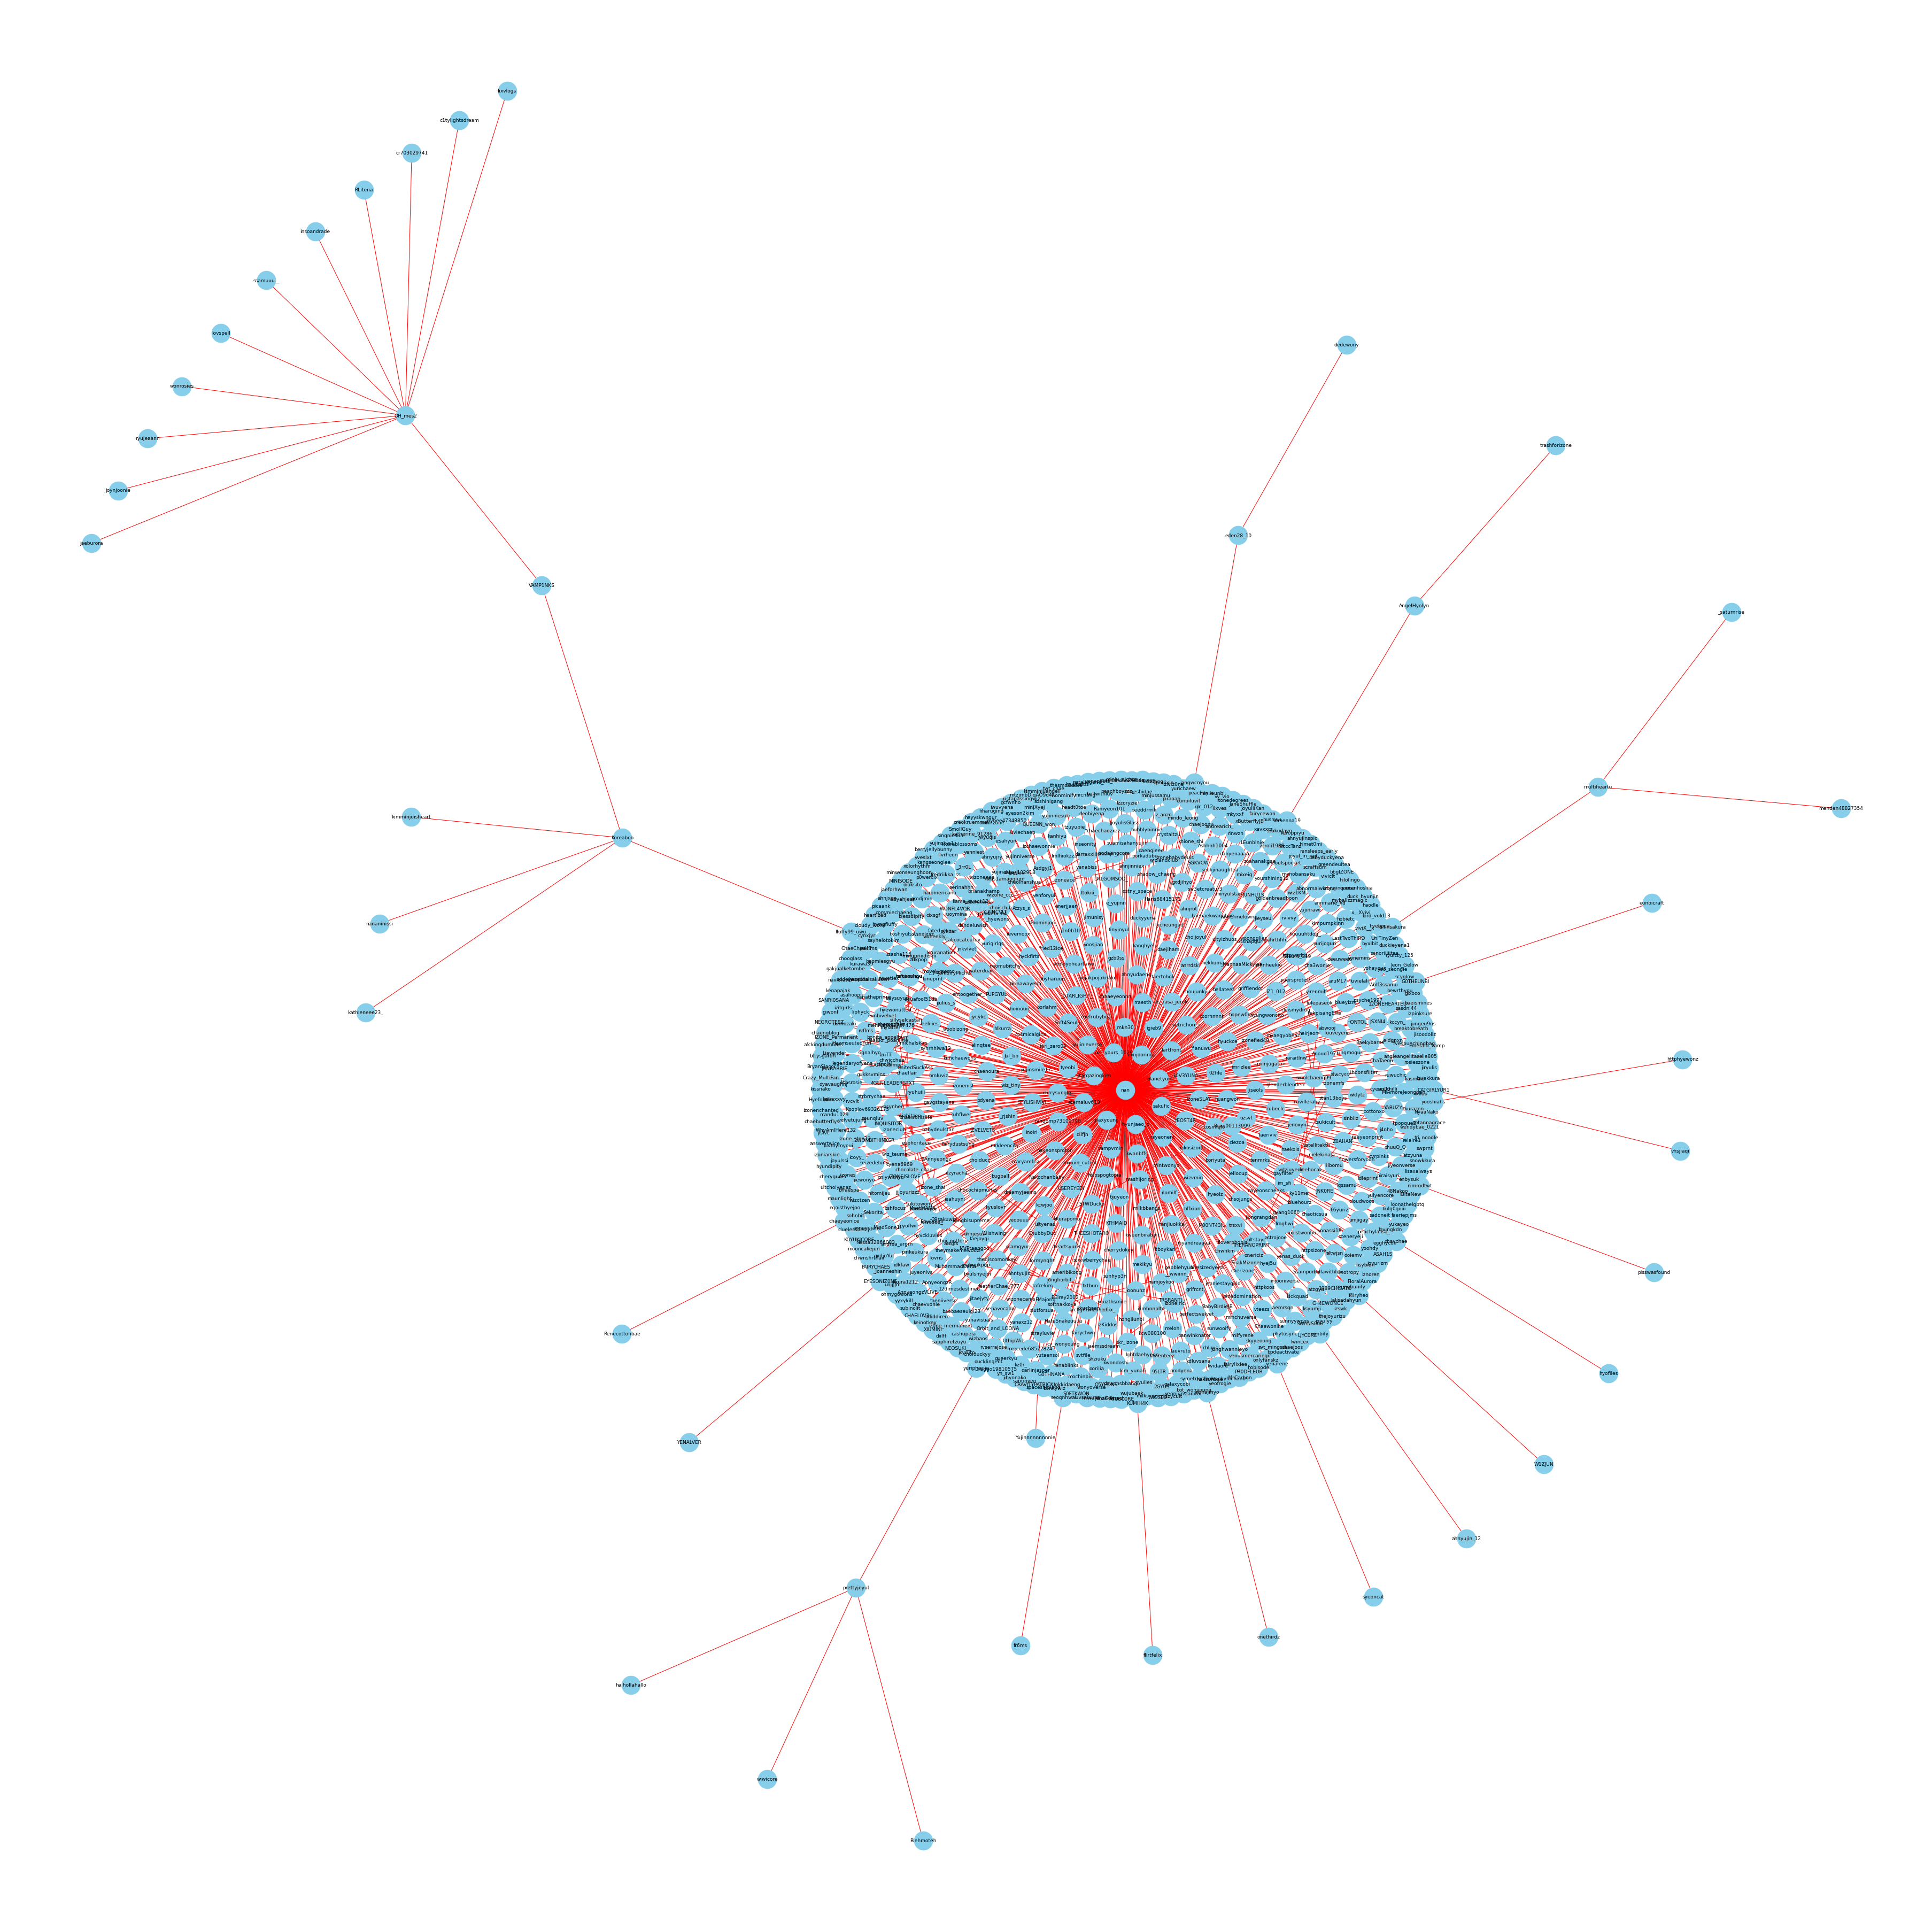

In [15]:
# Contstruct a Network
G1 = nx.from_pandas_edgelist(df_tweets)

# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
nx.draw(G1, with_labels=True, 
        node_color='skyblue', node_size=1200, 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=9,
        pos=nx.kamada_kawai_layout(G1))

### **Network Metrics and Measurement**

Centrality Measurement

In [16]:
# Degree Centrality
degree = nx.degree_centrality(G1)

# Sorted from the Highest
sorted(nx.degree(G1), key=lambda x: x[1], reverse=True)[0:10]

[(nan, 760),
 ('OH_mes2', 12),
 ('Koreaboo', 5),
 ('prettyjoyul', 4),
 ('yenarene', 4),
 ('ultyizhuos', 3),
 ('multiheartu', 3),
 ('yoosjian', 3),
 ('_3rr0L', 3),
 ('seoqnhwa', 3)]

In [17]:
# Betweenness Centrality
betweenness = nx.betweenness_centrality(G1)

# Sorted from the Highest
sorted(nx.betweenness_centrality(G1, normalized=True).items(), key=lambda x:x[1], reverse=True)[0:10]

[(nan, 0.8481197836064706),
 ('fluffy99_uwu', 0.03525786013782522),
 ('Koreaboo', 0.033337301429837436),
 ('VAMP1NKS', 0.025046625133923254),
 ('OH_mes2', 0.023134002618943692),
 ('yuriphoriie', 0.008433527770062035),
 ('prettyjoyul', 0.006341018213562953),
 ('fallinsakura', 0.00633308202055474),
 ('multiheartu', 0.00422999087337804),
 ('iamenna19', 0.004227345475708635)]

In [18]:
# Closeness Centrality
closeness = nx.closeness_centrality(G1)

# Sorted from the Highest
sorted(nx.closeness_centrality(G1).items(), key=lambda x:x[1], reverse=True)[0:10]

[(nan, 0.830486952469711),
 ('fluffy99_uwu', 0.44587207605387147),
 ('yuriphoriie', 0.4389716748768473),
 ('fallinsakura', 0.4384497109352577),
 ('iamenna19', 0.43792898681300674),
 ('jangwcnyou', 0.43792898681300674),
 ('yenarene', 0.43792898681300674),
 ('seoqnhwa', 0.4376690883045124),
 ('bitesizedyena', 0.4376690883045124),
 ('G0THEUNBI', 0.4374094980979261)]

In [19]:
# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality_numpy(G1)

# Sorted from the Highest
sorted(nx.eigenvector_centrality_numpy(G1).items(), key=lambda x:x[1], reverse=True)[0:10]

[(nan, 0.7069294836997944),
 ('yenarene', 0.027633709024486253),
 ('bitesizedyena', 0.02759860914628417),
 ('lavienteez', 0.026633023027824575),
 ('kwanbffs', 0.026631750413196296),
 ('seoqnhwa', 0.02663042979977422),
 ('prodyena', 0.026596647180300793),
 ('inoiri', 0.026595376245227155),
 ('astrojooe', 0.026595376245227155),
 ('sakufic', 0.026595376245227148)]

**Visualize Network based on Centrality Measurement**

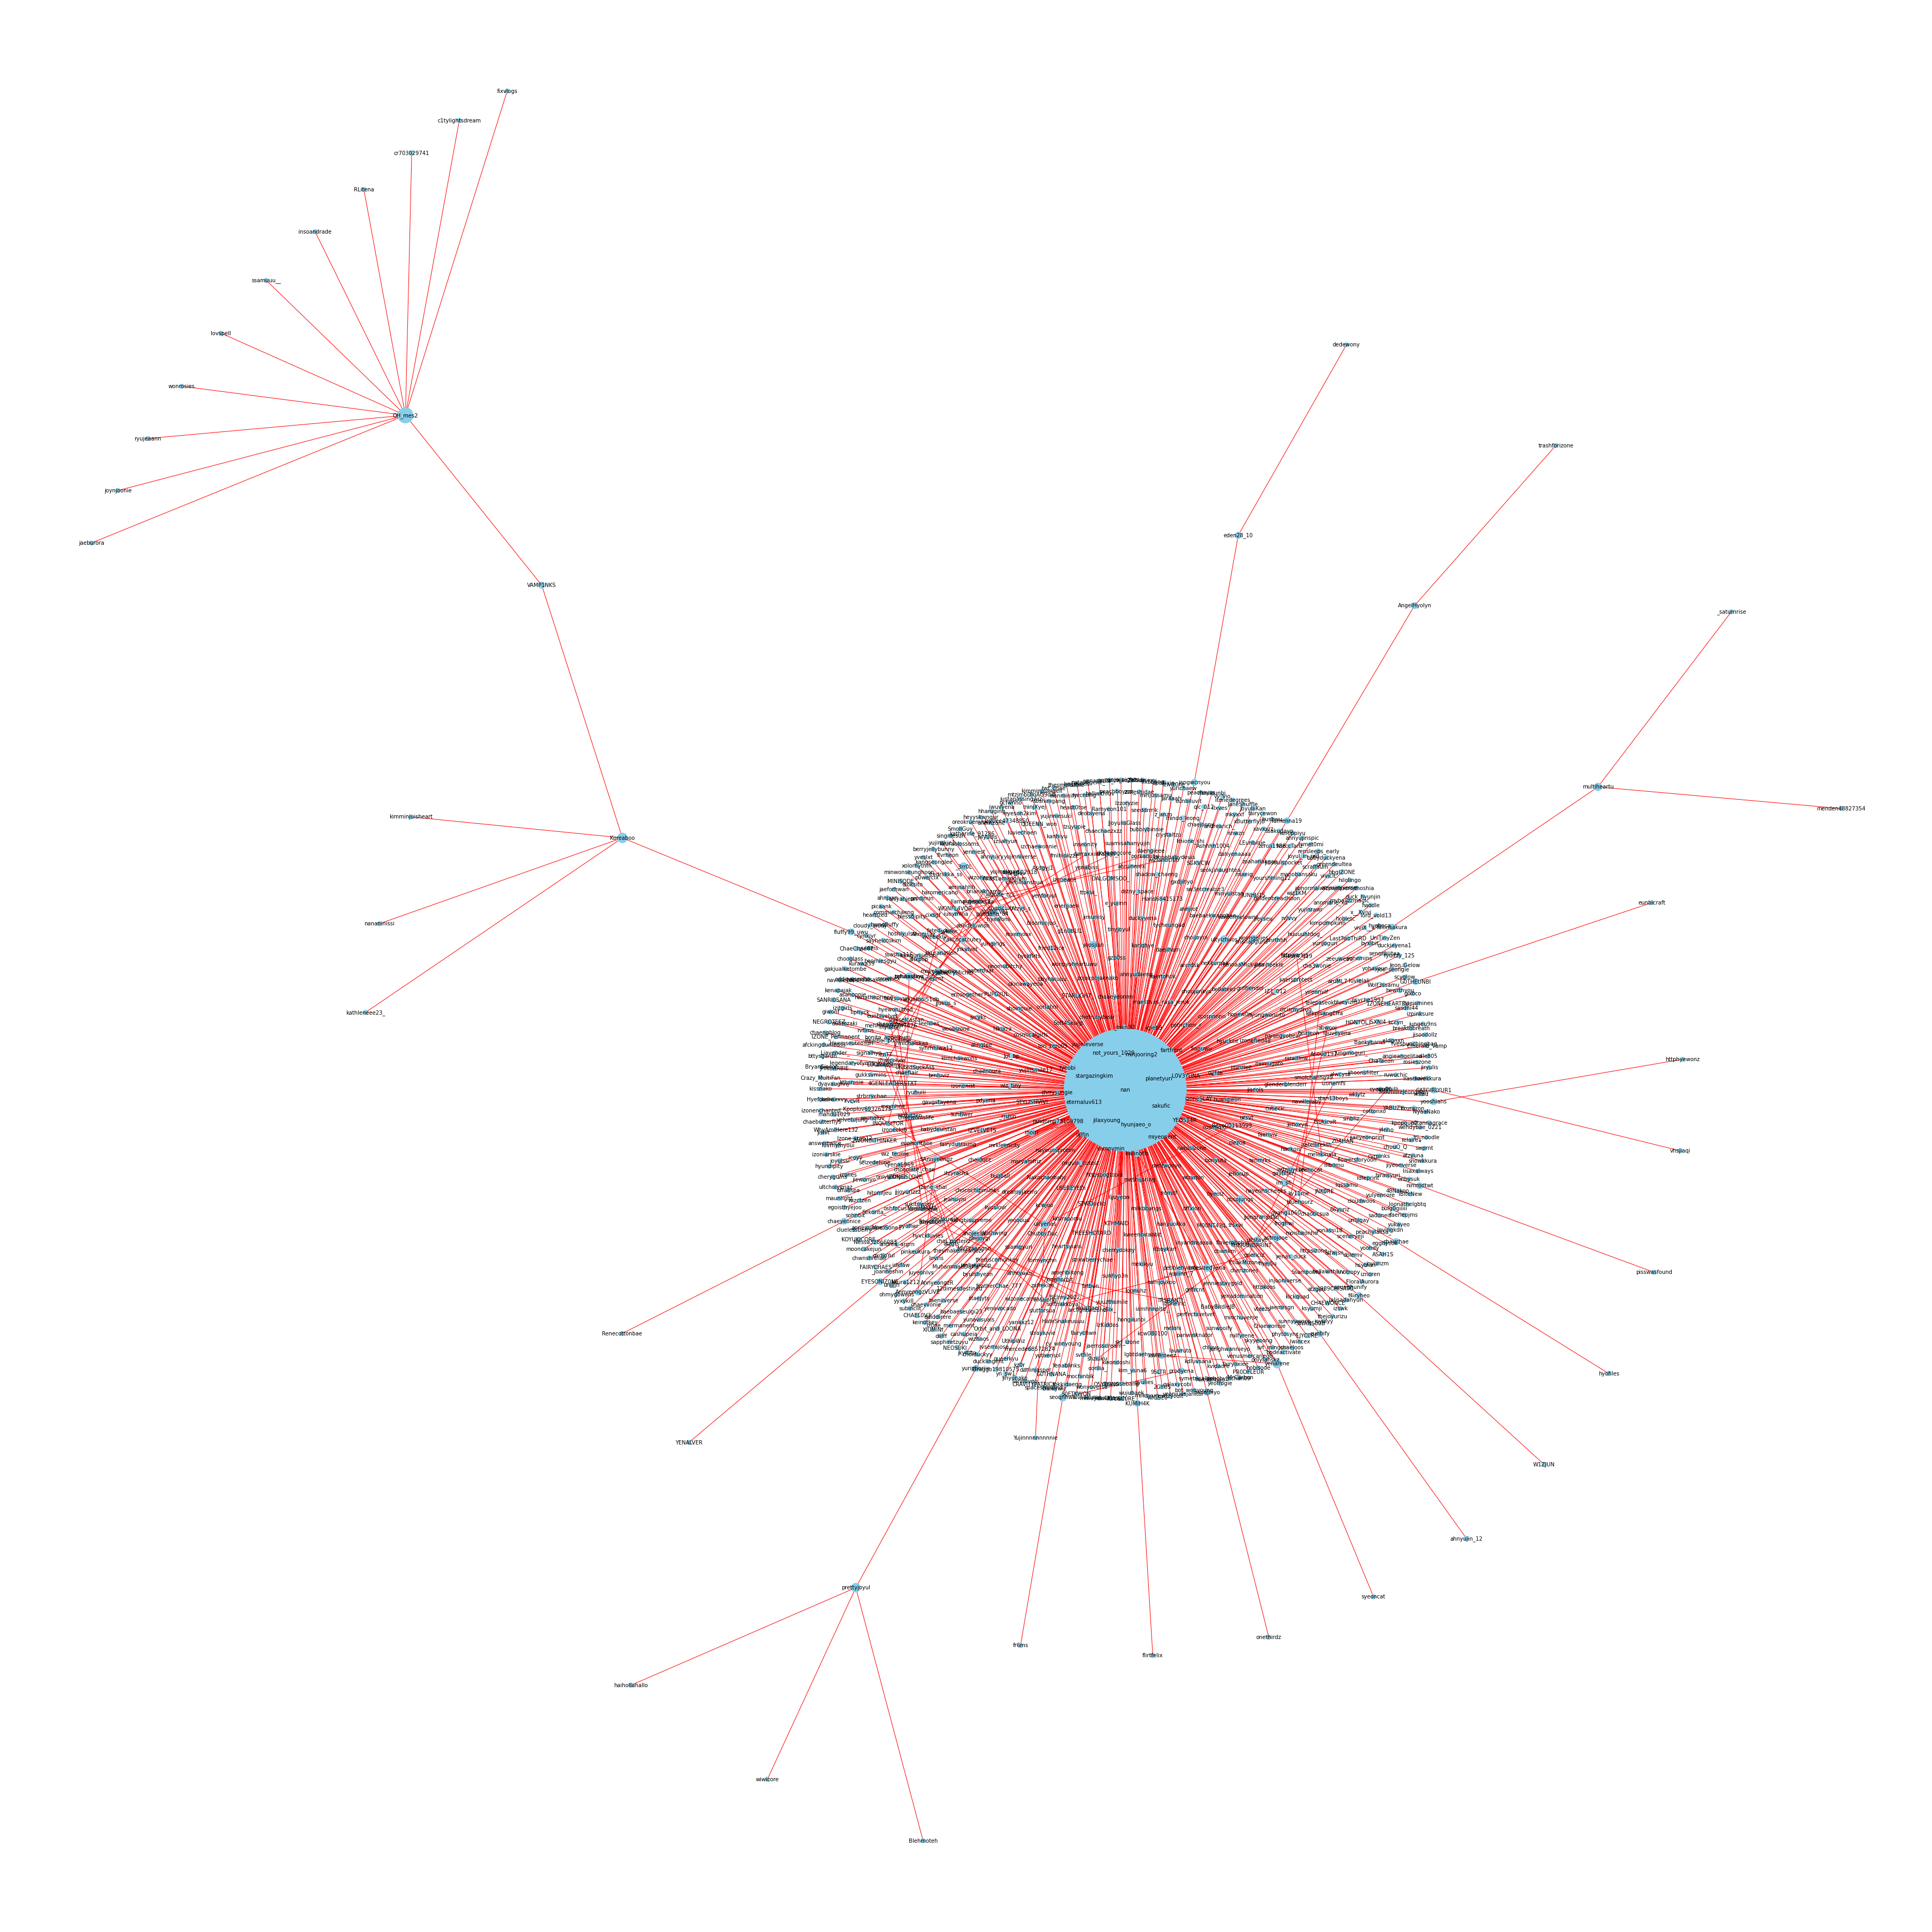

In [20]:
# Set Degree Dictionary
d = dict(degree)

# Contstruct a Network
G1 = nx.from_pandas_edgelist(df_tweets)

# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
nx.draw(G1, with_labels=True, 
        node_color='skyblue', nodelist=d.keys(),
        node_size=[v * 60000 for v in d.values()], 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=10,
        pos=nx.kamada_kawai_layout(G1))

**Network Topology Measurement**

In [21]:
# Show Number of Nodes
nx.number_of_nodes(G1)

871

In [22]:
# Show Number of Edges
nx.number_of_edges(G1)

857

In [23]:
# Show Graph Density
nx.density(G1)

0.0022619000488274805

In [24]:
# Show Number of Connected Component
nx.number_connected_components(G1)

42

### Community Detection

Dalam community detection, tujuannya adalah untuk membagi jaringan ke dalam daerah-daerah pada graph. Daerah tersebut biasanya sesuai dengan entitas-entitas yang memiliki
hubungan erat, dan dapat dikatakan sebagai satu komunitas

**Modularity Community**

In [25]:
# Import Module
from networkx.algorithms.community import greedy_modularity_communities

# Modularity Community Detection
communities_m = sorted(greedy_modularity_communities(G1), key=len, reverse=True)
communities_m

[frozenset({'02file',
            '12ONEHEARTEU',
            '12dimesdestined',
            '1989CHISATO',
            '2GYUS',
            '2WONBITHINKER',
            '39sakuwiz',
            '48Nakoo',
            '4GENLEADERSTXT',
            '66yuriz',
            '6juyeon',
            '95LTR',
            'ASAH1S',
            'Ahnnisaz',
            'AnnyeongzR',
            'Anoud197',
            'Asdgyj1',
            'Ashhhh1004',
            'Atzys_s',
            'BElrey2002',
            'BabyBirdieJB',
            'Baekybarns',
            'BryanSiacor',
            'CH4EWONCE',
            'CHAEL0V3',
            'CRAVITYPATRICK',
            'ChaTaeon',
            'ChaeChae47',
            'Chaewoniiie',
            'ChubbyDuc',
            'Crazy_MuItiFan',
            'DALGOMSOO_',
            'Draggo19810575',
            'Emerald_Vamp',
            'FAlRYCHAES',
            'FloralAurora',
            'G0THNANA',
            'HONTOL',
            'HaemseuteoYuri